In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import xgboost as xgb
from scipy import sparse
from IPython.display import Image
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import os
import json
# from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from datetime import datetime
import dateutil
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

random_state=2021


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# dataset = read_all()
df=pd.read_csv('/content/drive/MyDrive/iLab Unit /Instagram predictor/Instragram_after_Preprocessing.csv')

In [88]:
df

,Unnamed: 0,id,external_url,followers,posts_count,following,profile_image_link,likes,datetime,image_url,url,comments,thumbnails,account,hashtags,biography,caption,profile
0,0,2.770000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,173.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZki1wfvXYq/,17.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurinojoffily', '#drmaurino', '#jÃ³ffily',...",have bbl authent expertnflag4 specialis vaserl...,quick recoveri result 10 day maurinojoffili dr...,Dr Maurino Joffily
1,1,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,388.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZUrYFrOO5v/,24.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurinojoffily', '#drmaurino', '#drjoffily'...",have bbl authent expertnflag4 specialis vaserl...,thi patient happi chang bodi total new figur a...,Dr Maurino Joffily
2,2,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,160.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZAgVoyPi0i/,8.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#maurino', '#joffily', '#joffilyvaser', '#dr...",have bbl authent expertnflag4 specialis vaserl...,360 vaser lipo fat transfer correct hip dip ma...,Dr Maurino Joffily
3,3,2.760000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,211.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CY9pMGVP_BY/,24.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#drjoffily', '#maurino', '#maurinojoffily', ...",have bbl authent expertnflag4 specialis vaserl...,breast uplift without implant good combin 360 ...,Dr Maurino Joffily
4,4,2.750000e+18,http://www.drjoffily.co.uk/,23300.0,276.0,7003.0,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....,210.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CYrbwXQrY3v/,15.0,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n...",maurino_joffily,"['#drmaurino', '#maurino', '#drjoffily', '#vas...",have bbl authent expertnflag4 specialis vaserl...,great transform combin procedur drmaurino maur...,Dr Maurino Joffily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,12863,2.200000e+18,https://linktr.ee/thehamletclinic,8048.0,815.0,690.0,https://scontent-frt3-2.cdninstagram.com/v/t51...,148.0,1.580000e+12,https://instagram.fmnl30-1.fna.fbcdn.net/v/t51...,https://www.instagram.com/p/B6IZU3mngad/,25.0,"[{""src"":""https://instagram.fmnl30-1.fna.fbcdn....",thehamletclinic,"['#natural', '#bodyshape', '#bodysculpting', '...",Dr grant hamletâ£â£â£â£â£â£â£ vasersreg...,At 3 week post op still work progress transfor...,THE HAMLET CLINIC
12864,12864,2.110000e+18,https://linktr.ee/thehamletclinic,8048.0,815.0,690.0,https://scontent-frt3-2.cdninstagram.com/v/t51...,49.0,1.570000e+12,https://instagram.fmnl30-1.fna.fbcdn.net/v/t51...,https://www.instagram.com/p/B07rC4ZDqcM/,17.0,"[{""src"":""https://instagram.fmnl30-1.fna.fbcdn....",thehamletclinic,"['#filler', '#botox', '#natural', '#beauty', '...",Dr grant hamletâ£â£â£â£â£â£â£ vasersreg...,what work think bella hadid done â â â â â...,THE HAMLET CLINIC
12865,12865,2.110000e+18,https://linktr.ee/thehamletclinic,8048.0,815.0,690.0,https://scontent-frt3-2.cdninstagram.com/v/t51...,12.0,1.570000e+12,https://instagram.fmnl30-1.fna.fbcdn.net/v/t51...,https://www.instagram.com/p/B05GQvsgaA9/,0.0,"[{""src"":""https://instagram.fmnl30-1.fna.fbcdn....",thehamletclinic,"['#filler', '#botox', '#natural', '#beauty', '...",Dr grant hamletâ£â£â£â£â£â£â£ vasersreg...,botox fi

# Import Dataset

In [89]:
# columns_to_drop = ['username',
#  'fbid',
#  'connected_fb_page',
#  'profile_pic_url',
#  'full_name',
#  'is_verified',]

In [90]:
# def check_nanColumns(dfRaw):
#     nan_col = []
#     cols = list(dfRaw.columns)
#     for col in cols:
#         if dfRaw[col].isnull().values.any() == True:
#             nan_col.append(col)
#     return nan_col

# len(columns_to_drop)

In [91]:
# dfRaw.drop(columns_to_drop, axis = 1, inplace=True)

In [92]:
# cols = list(dfRaw.columns)
# nan_cols = (check_nanColumns(dfRaw))
# print('Total columns: ', cols, ' with length: ', len(cols), '\n','Columns containing nan values: ',nan_cols,' and length: ', len(nan_cols)) #if the columns where nan is accepted, can be dealt here.
# print('Shape of dataframe: ', dfRaw.shape)

In [93]:
# #Removing the nan rows from all the columns:
# dfRaw = dfRaw.dropna()
# print("New shape after removing nan: ", dfRaw.shape)

In [94]:
# cols = list(dfRaw.columns)
# nan_cols = (check_nanColumns(dfRaw))
# print('Total columns: ', cols, ' with length: ', len(cols), '\n','Columns containing nan values: ',nan_cols,' and length: ', len(nan_cols)) #if the columns where nan is accepted, can be dealt here.
# print('Shape of dataframe: ', dfRaw.shape)

In [95]:
dropped = ['Unnamed: 0', 'id', 'external_url', 'profile_image_link', 'image_url', 'thumbnails', 'url', 'hashtags','biography','caption','profile']
data = df.drop(dropped,axis=1)
data

,followers,posts_count,following,likes,datetime,comments,account
0,23300.0,276.0,7003.0,173.0,1.640000e+12,17.0,maurino_joffily
1,23300.0,276.0,7003.0,388.0,1.640000e+12,24.0,maurino_joffily
2,23300.0,276.0,7003.0,160.0,1.640000e+12,8.0,maurino_joffily
3,23300.0,276.0,7003.0,211.0,1.640000e+12,24.0,maurino_joffily
4,23300.0,276.0,7003.0,210.0,1.640000e+12,15.0,maurino_joffily
...,...,...,...,...,...,...,...
12863,8048.0,815.0,690.0,148.0,1.580000e+12,25.0,thehamletclinic
12864,8048.0,815.0,690.0,49.0,1.570000e+12,17.0,thehamletclinic
12865,8048.0,815.0,690.0,12.0,1.570000e+12,0.0,thehamletclinic
12866,8048.0,815.0,690.0,35.0,1.560000e+12,1.0,thehamletclinic


In [96]:
#Converting the columns into the float datatype
a=['followers','posts_count','following','likes','comments']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

,followers,posts_count,following,likes,datetime,comments,account
0,23300.0,276.0,7003.0,173.0,1.640000e+12,17.0,maurino_joffily
1,23300.0,276.0,7003.0,388.0,1.640000e+12,24.0,maurino_joffily
2,23300.0,276.0,7003.0,160.0,1.640000e+12,8.0,maurino_joffily
3,23300.0,276.0,7003.0,211.0,1.640000e+12,24.0,maurino_joffily
4,23300.0,276.0,7003.0,210.0,1.640000e+12,15.0,maurino_joffily
...,...,...,...,...,...,...,...
12863,8048.0,815.0,690.0,148.0,1.580000e+12,25.0,thehamletclinic
12864,8048.0,815.0,690.0,49.0,1.570000e+12,17.0,thehamletclinic
12865,8048.0,815.0,690.0,12.0,1.570000e+12,0.0,thehamletclinic
12866,8048.0,815.0,690.0,35.0,1.560000e+12,1.0,thehamletclinic


In [97]:
import datetime
def timeStampConversion(x):
    return datetime.datetime.fromtimestamp(int(x)/100000)

In [98]:
data['datetime'] = pd.to_numeric(data['datetime'], downcast="float")

In [99]:
data['datetime'] = data['datetime'].apply(lambda x: timeStampConversion(x)) 

In [100]:
data

,followers,posts_count,following,likes,datetime,comments,account
0,23300.0,276.0,7003.0,173.0,1970-07-09 19:33:19.959040,17.0,maurino_joffily
1,23300.0,276.0,7003.0,388.0,1970-07-09 19:33:19.959040,24.0,maurino_joffily
2,23300.0,276.0,7003.0,160.0,1970-07-09 19:33:19.959040,8.0,maurino_joffily
3,23300.0,276.0,7003.0,211.0,1970-07-09 19:33:19.959040,24.0,maurino_joffily
4,23300.0,276.0,7003.0,210.0,1970-07-09 19:33:19.959040,15.0,maurino_joffily
...,...,...,...,...,...,...,...
12863,8048.0,815.0,690.0,148.0,1970-07-02 20:53:19.528960,25.0,thehamletclinic
12864,8048.0,815.0,690.0,49.0,1970-07-01 17:06:39.457280,17.0,thehamletclinic
12865,8048.0,815.0,690.0,12.0,1970-07-01 17:06:39.457280,0.0,thehamletclinic
12866,8048.0,815.0,690.0,35.0,1970-06-30 13:19:59.385600,1.0,thehamletclinic


In [101]:
data["datetime"]

0       1970-07-09 19:33:19.959040
1       1970-07-09 19:33:19.959040
2       1970-07-09 19:33:19.959040
3       1970-07-09 19:33:19.959040
4       1970-07-09 19:33:19.959040
                   ...            
12863   1970-07-02 20:53:19.528960
12864   1970-07-01 17:06:39.457280
12865   1970-07-01 17:06:39.457280
12866   1970-06-30 13:19:59.385600
12867   1970-06-30 13:19:59.385600
Name: datetime, Length: 12868, dtype: datetime64[ns]

In [102]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12868 entries, 0 to 12867
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   followers    12868 non-null  float64       
 1   posts_count  12868 non-null  float64       
 2   following    12868 non-null  float64       
 3   likes        12868 non-null  float64       
 4   datetime     12868 non-null  datetime64[ns]
 5   comments     12868 non-null  float64       
 6   account      12868 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 703.8+ KB


In [104]:
data['Dow'] = data['datetime'].dt.weekday
data['Hod']= data['datetime'].dt.hour
data['Date']= data['datetime'].dt.date

In [105]:
data

,followers,posts_count,following,likes,datetime,comments,account,Dow,Hod,Date
0,23300.0,276.0,7003.0,173.0,1970-07-09 19:33:19.959040,17.0,maurino_joffily,3,19,1970-07-09
1,23300.0,276.0,7003.0,388.0,1970-07-09 19:33:19.959040,24.0,maurino_joffily,3,19,1970-07-09
2,23300.0,276.0,7003.0,160.0,1970-07-09 19:33:19.959040,8.0,maurino_joffily,3,19,1970-07-09
3,23300.0,276.0,7003.0,211.0,1970-07-09 19:33:19.959040,24.0,maurino_joffily,3,19,1970-07-09
4,23300.0,276.0,7003.0,210.0,1970-07-09 19:33:19.959040,15.0,maurino_joffily,3,19,1970-07-09
...,...,...,...,...,...,...,...,...,...,...
12863,8048.0,815.0,690.0,148.0,1970-07-02 20:53:19.528960,25.0,thehamletclinic,3,20,1970-07-02
12864,8048.0,815.0,690.0,49.0,1970-07-01 17:06:39.457280,17.0,thehamletclinic,2,17,1970-07-01
12865,8048.0,815.0,690.0,12.0,1970-07-01 17:06:39.457280,0.0,thehamletclinic,2,17,1970-07-01
12866,8048.0,815.0,690.0,35.0,1970-06-30 13:19:59.385600,1.0,thehamletclinic,1,13,1970-06-30


In [106]:
data['mon']=(data['Dow']==0).astype(int)
data['tue']=(data['Dow']==1).astype(int)
data['wed']=(data['Dow']==2).astype(int)
data['thu']=(data['Dow']==3).astype(int)
data['fri']=(data['Dow']==4).astype(int)
data['sat']=(data['Dow']==5).astype(int)
data['sun']=(data['Dow']==6).astype(int)

In [107]:
data = data.drop(['Dow'], axis=1)

In [108]:
data

,followers,posts_count,following,likes,datetime,comments,account,Hod,Date,mon,tue,wed,thu,fri,sat,sun
0,23300.0,276.0,7003.0,173.0,1970-07-09 19:33:19.959040,17.0,maurino_joffily,19,1970-07-09,0,0,0,1,0,0,0
1,23300.0,276.0,7003.0,388.0,1970-07-09 19:33:19.959040,24.0,maurino_joffily,19,1970-07-09,0,0,0,1,0,0,0
2,23300.0,276.0,7003.0,160.0,1970-07-09 19:33:19.959040,8.0,maurino_joffily,19,1970-07-09,0,0,0,1,0,0,0
3,23300.0,276.0,7003.0,211.0,1970-07-09 19:33:19.959040,24.0,maurino_joffily,19,1970-07-09,0,0,0,1,0,0,0
4,23300.0,276.0,7003.0,210.0,1970-07-09 19:33:19.959040,15.0,maurino_joffily,19,1970-07-09,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,8048.0,815.0,690.0,148.0,1970-07-02 20:53:19.528960,25.0,thehamletclinic,20,1970-07-02,0,0,0,1,0,0,0
12864,8048.0,815.0,690.0,49.0,1970-07-01 17:06:39.457280,17.0,thehamletclinic,17,1970-07-01,0,0,1,0,0,0,0
12865,8048.0,815.0,690.0,12.0,1970-07-01 17:06:39.457280,0.0,thehamletclinic,17,1970-07-01,0,0,1,0,0,0,0
12866,8048.0,815.0,690.0,35.0,1970-06-30 13:19:59.385600,1.0,thehamletclinic,13,1970-06-30,0,1,0,0,0,0,0


In [109]:
data.drop(['datetime'], axis=1, inplace=True)

In [110]:
data.drop(['Date'], axis=1, inplace=True)

In [111]:
data

,followers,posts_count,following,likes,comments,account,Hod,mon,tue,wed,thu,fri,sat,sun
0,23300.0,276.0,7003.0,173.0,17.0,maurino_joffily,19,0,0,0,1,0,0,0
1,23300.0,276.0,7003.0,388.0,24.0,maurino_joffily,19,0,0,0,1,0,0,0
2,23300.0,276.0,7003.0,160.0,8.0,maurino_joffily,19,0,0,0,1,0,0,0
3,23300.0,276.0,7003.0,211.0,24.0,maurino_joffily,19,0,0,0,1,0,0,0
4,23300.0,276.0,7003.0,210.0,15.0,maurino_joffily,19,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,8048.0,815.0,690.0,148.0,25.0,thehamletclinic,20,0,0,0,1,0,0,0
12864,8048.0,815.0,690.0,49.0,17.0,thehamletclinic,17,0,0,1,0,0,0,0
12865,8048.0,815.0,690.0,12.0,0.0,thehamletclinic,17,0,0,1,0,0,0,0
12866,8048.0,815.0,690.0,35.0,1.0,thehamletclinic,13,0,1,0,0,0,0,0


In [112]:
a=df['account'].nunique(dropna = True)

In [113]:
data1 = data.iloc[:]

In [114]:
print(data1.shape, data.shape)

(12868, 14) (12868, 14)


In [115]:
# data1.set_index('account')
data1.head()

,followers,posts_count,following,likes,comments,account,Hod,mon,tue,wed,thu,fri,sat,sun
0,23300.0,276.0,7003.0,173.0,17.0,maurino_joffily,19,0,0,0,1,0,0,0
1,23300.0,276.0,7003.0,388.0,24.0,maurino_joffily,19,0,0,0,1,0,0,0
2,23300.0,276.0,7003.0,160.0,8.0,maurino_joffily,19,0,0,0,1,0,0,0
3,23300.0,276.0,7003.0,211.0,24.0,maurino_joffily,19,0,0,0,1,0,0,0
4,23300.0,276.0,7003.0,210.0,15.0,maurino_joffily,19,0,0,0,1,0,0,0


In [117]:
data1[data1['account'] == 0]['likes'].aggregate('mean')

nan

In [118]:
a = data1.groupby(by = ['account'])['likes'].aggregate('mean').to_frame('avg_likes')
a.head()

,avg_likes
account,
108harleystreet,4.541667
111skin,214.463415
1gemmaclare,59.702128
CPMedicalClinic,22.034483
CosmeticSurgeonsLondon,16.816327


In [119]:
x = pd.merge(data1, a, on = 'account')

In [120]:
data=x

In [121]:
data.shape

(12868, 15)

In [122]:
# x[x['account']==0]

In [123]:
le = preprocessing.LabelEncoder()
le.fit(data["account"])
list(le.classes_)
account_num=le.transform(data["account"])
data["account"]=account_num

In [124]:
data

,followers,posts_count,following,likes,comments,account,Hod,mon,tue,wed,thu,fri,sat,sun,avg_likes
0,23300.0,276.0,7003.0,173.0,17.0,176,19,0,0,0,1,0,0,0,319.288889
1,23300.0,276.0,7003.0,388.0,24.0,176,19,0,0,0,1,0,0,0,319.288889
2,23300.0,276.0,7003.0,160.0,8.0,176,19,0,0,0,1,0,0,0,319.288889
3,23300.0,276.0,7003.0,211.0,24.0,176,19,0,0,0,1,0,0,0,319.288889
4,23300.0,276.0,7003.0,210.0,15.0,176,19,0,0,0,1,0,0,0,319.288889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,3875.0,13.0,595.0,191.0,21.0,183,8,1,0,0,0,0,0,0,123.454545
12864,3875.0,13.0,595.0,80.0,11.0,183,8,1,0,0,0,0,0,0,123.454545
12865,3875.0,13.0,595.0,68.0,7.0,183,8,1,0,0,0,0,0,0,123.454545
12866,3875.0,13.0,595.0,61.0,7.0,183,8,1,0,0,0,0,0,0,123.454545


In [125]:
y=data["likes"]
X = data.drop('likes', axis=1)

In [129]:
X.shape

(12868, 14)

# Create train and test dataset

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

##XG Boost Model

###Hyperparameter Tuning

In [132]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_grid = GridSearchCV(model,parameters,cv = 2,n_jobs = 5, verbose=True)

model_grid.fit(X_train, y_train)

model_grid.best_score_
model_grid.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

##XGBRegressor with plot importance

In [133]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.03,
                max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,silent=1,subsample=0.7)

In [134]:
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

In [135]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred)
print("R2 Score: %f" % (R2))
print()

RMSE: 494.406146
R2 Score: 0.679838



#Random Forest

##Hyperparameter tuning

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


model_rand = RandomForestRegressor()


n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

# model_rand.best_score_
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}  



In [137]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=250, criterion='mse', max_depth=30)

rnd_clf.fit(X_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [138]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

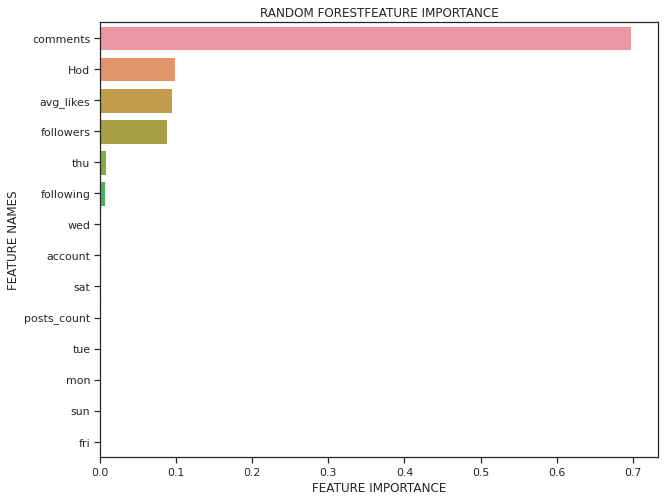

In [139]:
plot_feature_importance(rnd_clf.feature_importances_,X_train.columns,'RANDOM FOREST')

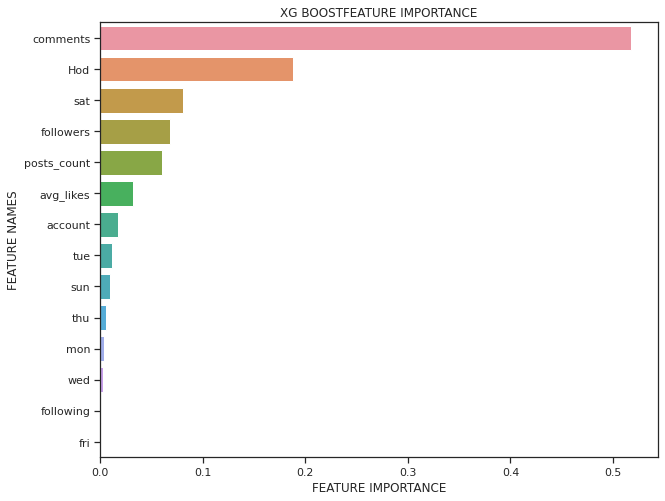

In [140]:
plot_feature_importance(xg_reg.feature_importances_,X_train.columns,'XG BOOST')

In [141]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnd_clf))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2))
print()

RMSE: 331.366146
R2 Score: 0.856180

